# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [36]:
import pandas as pd
import datetime as dt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [9]:
apple = pd.read_csv("apple.csv", parse_dates= ["Date"], index_col= "Date")
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 2014-07-08 to 1980-12-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8465 non-null   float64
 1   High       8465 non-null   float64
 2   Low        8465 non-null   float64
 3   Close      8465 non-null   float64
 4   Volume     8465 non-null   int64  
 5   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 462.9 KB


In [10]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [7]:
### Step 3. Assign it to a variable apple
### Step 4.  Check out the type of the columns
### Step 5. Transform the Date column as a datetime typ
### Step 6.  Set the date as the index

apple = pd.read_csv("apple.csv", parse_dates= ["Date"], index_col= "Date")
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 2014-07-08 to 1980-12-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8465 non-null   float64
 1   High       8465 non-null   float64
 2   Low        8465 non-null   float64
 3   Close      8465 non-null   float64
 4   Volume     8465 non-null   int64  
 5   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 462.9 KB


### Step 7.  Is there any duplicate dates?

In [13]:
apple.index.value_counts().sort_values(ascending = False)

Date
2014-07-08    1
2014-06-13    1
2014-07-03    1
2014-07-02    1
2014-07-01    1
             ..
1980-12-17    1
1980-12-16    1
1980-12-15    1
1981-01-27    1
1980-12-12    1
Name: count, Length: 8465, dtype: int64

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [16]:
apple.sort_index(ascending = True, inplace = True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [18]:
apple["Date"] = apple.index

,Open,High,Low,Close,Volume,Adj Close,Date
Date,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,1980-12-12
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,1980-12-15
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1980-12-16
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,1980-12-17
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,1980-12-18


In [21]:
apple[apple["Date"] == (apple["Date"] + pd.offsets.BMonthEnd(0))]

,Open,High,Low,Close,Volume,Adj Close,Date
Date,,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53,1980-12-31
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44,1981-01-30
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41,1981-02-27
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38,1981-03-31
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44,1981-04-30
...,...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200,74.76,2014-02-28
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25,2014-03-31
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83,2014-04-30


### Step 10.  What is the difference in days between the first day and the oldest

In [29]:
(apple.index[-1] - apple.index[0])

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [34]:
apple.to_period("M", axis = 0).index.nunique()

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<Axes: title={'center': 'Apple Stock'}, xlabel='Date'>

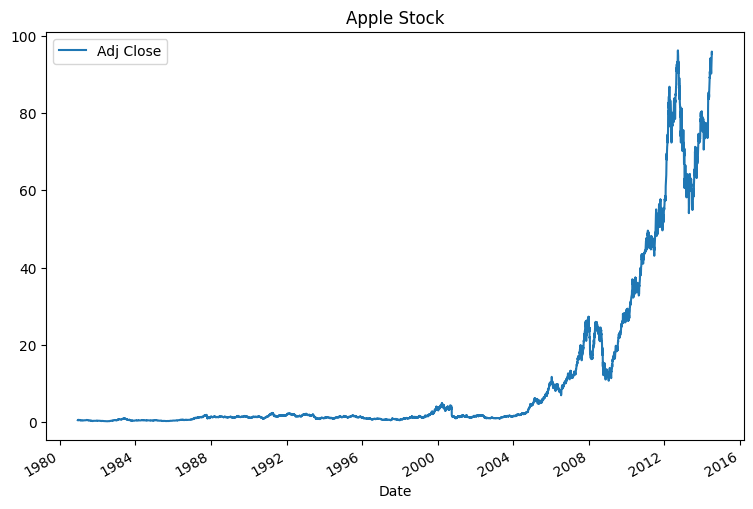

In [40]:
apple.plot(kind = "line", y = "Adj Close", title = "Apple Stock", figsize = (9,6))

### BONUS: Create your own question and answer it.